# DELAY ANALYSIS

In [4]:
! pip install openpyxl

     ---------------------------------------- 0.0/249.8 kB ? eta -:--:--
     - -------------------------------------- 10.2/249.8 kB ? eta -:--:--
     -------------------------------------- 249.8/249.8 kB 3.1 MB/s eta 0:00:00


In [29]:
import pandas as pd
import openpyxl

In [30]:
df_delay = pd.read_excel('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_delay_analysis.xlsx')

In [31]:
df_delay

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [32]:
df_delay.describe(include='all')

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


## Data Cleaning

### Canceled rentals

In [33]:
df_delay.state.value_counts(dropna=False)

ended       18045
canceled     3265
Name: state, dtype: int64

In [34]:
df_delay_canceled = df_delay[df_delay.state=='canceled']
df_delay_canceled

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
8,512475,322502,mobile,canceled,NaN,NaN,NaN
10,513743,330658,mobile,canceled,NaN,NaN,NaN
11,514161,366037,connect,canceled,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21283,569325,345079,mobile,canceled,NaN,NaN,NaN
21287,569764,405347,mobile,canceled,NaN,NaN,NaN
21288,570001,386413,connect,canceled,NaN,NaN,NaN
21297,571481,311841,mobile,canceled,NaN,NaN,NaN


In [35]:
df_delay_canceled.delay_at_checkout_in_minutes.value_counts(dropna=False)

 NaN        3264
-17468.0       1
Name: delay_at_checkout_in_minutes, dtype: int64

### There is one cancellation with a delay. We will remove the delay for this cancellation.

In [36]:
df_delay.delay_at_checkout_in_minutes = df_delay.apply(lambda x : None if (x.state=='canceled') else x.delay_at_checkout_in_minutes, axis = 1)

In [37]:
df_delay[df_delay.state=='canceled'].delay_at_checkout_in_minutes.value_counts(dropna=False)

NaN    3265
Name: delay_at_checkout_in_minutes, dtype: int64

### Ended rentals

In [38]:
df_delay_ended = df_delay[df_delay.state=='ended']
df_delay_ended

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN
5,511626,398802,mobile,ended,-203.0,NaN,NaN
6,511639,370585,connect,ended,-15.0,563782.0,570.0
...,...,...,...,...,...,...,...
21305,573446,380069,mobile,ended,NaN,573429.0,300.0
21306,573790,341965,mobile,ended,-337.0,NaN,NaN
21307,573791,364890,mobile,ended,144.0,NaN,NaN
21308,574852,362531,connect,ended,-76.0,NaN,NaN


In [41]:
pd.isnull(df_delay_ended.delay_at_checkout_in_minutes).value_counts()

False    16345
True      1700
Name: delay_at_checkout_in_minutes, dtype: int64

### There are 1700 ended rentals with no delay at checkout. We can not infer data on it. We decide to remove it.

In [44]:
print("Row count before deletions:", df_delay.shape[0])
df_delay.drop(df_delay[(df_delay.state=='ended') & pd.isnull(df_delay_ended.delay_at_checkout_in_minutes)].index, inplace=True)
print("Row count after deletions:", df_delay.shape[0])

Row count before deletions: 21310
Row count after deletions: 19610


### Can we rely on the previous_ended_rental_id column ?

In [54]:
pd.isnull(df_delay.previous_ended_rental_id).value_counts()

True     17866
False     1744
Name: previous_ended_rental_id, dtype: int64

### Over the 19610 rows in the cleaned dataset, only 1744 contains the id of the previous ended rental

In [95]:
df_delay[df_delay.previous_ended_rental_id.notnull()].previous_ended_rental_id.isin(df_delay.rental_id).value_counts()

True     1682
False      62
Name: previous_ended_rental_id, dtype: int64

### Over the 1744 rows containing the id of the previous ended rental, 62 ids are not defined in the rental_id column. This data seems to be not reliable. We could exploit it later anyway.

## Outliers removal

In [122]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [139]:
df_delay[(df_delay.state=='ended')].delay_at_checkout_in_minutes.describe()

count    16345.000000
mean        60.773876
std        993.173222
min     -22433.000000
25%        -36.000000
50%          9.000000
75%         67.000000
max      71084.000000
Name: delay_at_checkout_in_minutes, dtype: float64

In [143]:
print("Mean value is :",  df_delay[(df_delay.state=='ended')].delay_at_checkout_in_minutes.mean())
print("Median value is :",  df_delay[(df_delay.state=='ended')].delay_at_checkout_in_minutes.median())

Mean value is : 60.77387580299786
Median value is : 9.0


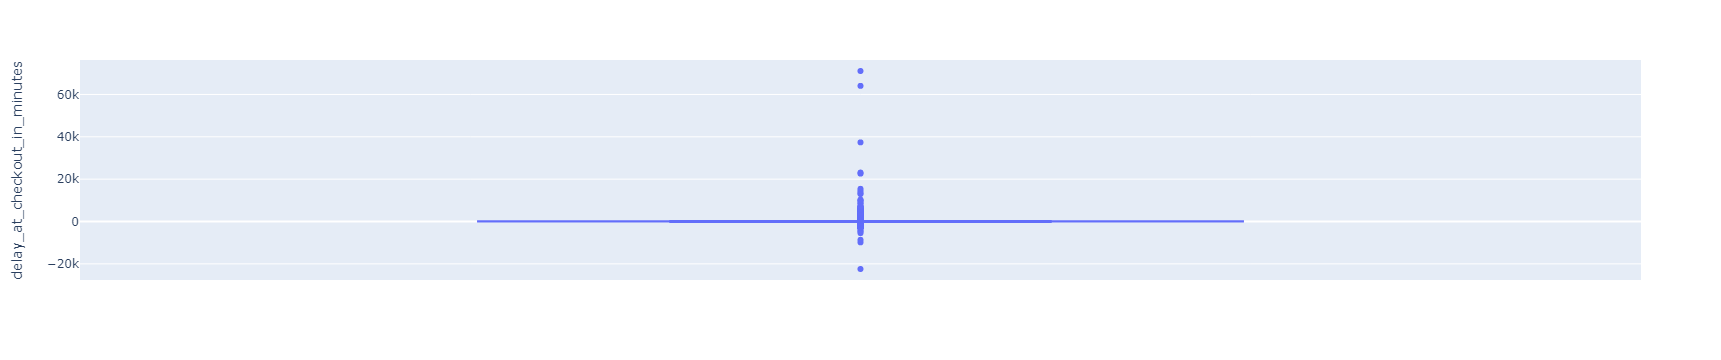

In [144]:
fig = px.box(df_delay[(df_delay.state=='ended')], y="delay_at_checkout_in_minutes")
fig.show()

### Box plot is not exploitable. Let's focus on delay at checkout less than 500 minutes, in absolute value.

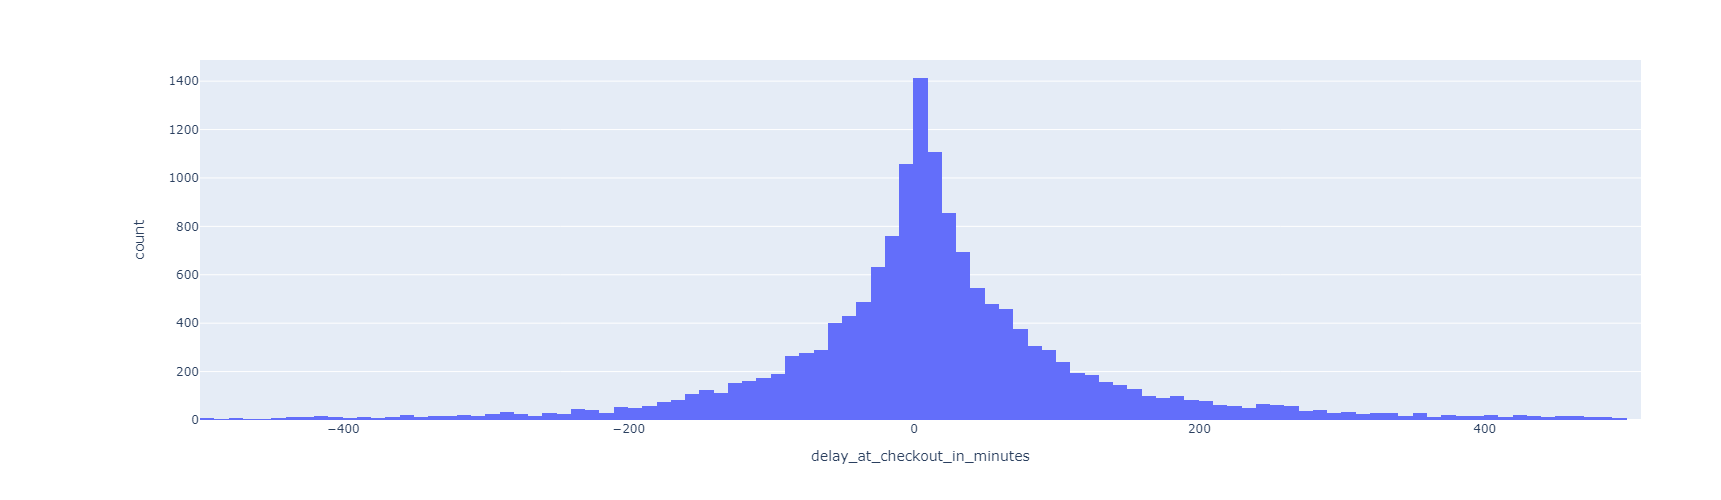

In [155]:
df_delay_without_outliers = df_delay[abs(df_delay.delay_at_checkout_in_minutes)<=500]
fig = px.histogram(df_delay_without_outliers, x='delay_at_checkout_in_minutes')
fig.update_layout(showlegend = True, margin = {'l': 200}, width=1000, height=500)
fig.show()

In [158]:
print("Remaining data count to study the delay at checkout is :", df_delay_without_outliers.shape[0])

Remaining data count to study the delay at checkout is : 15301


## Insights

### 0-Comparison of count between mobile and connect rental

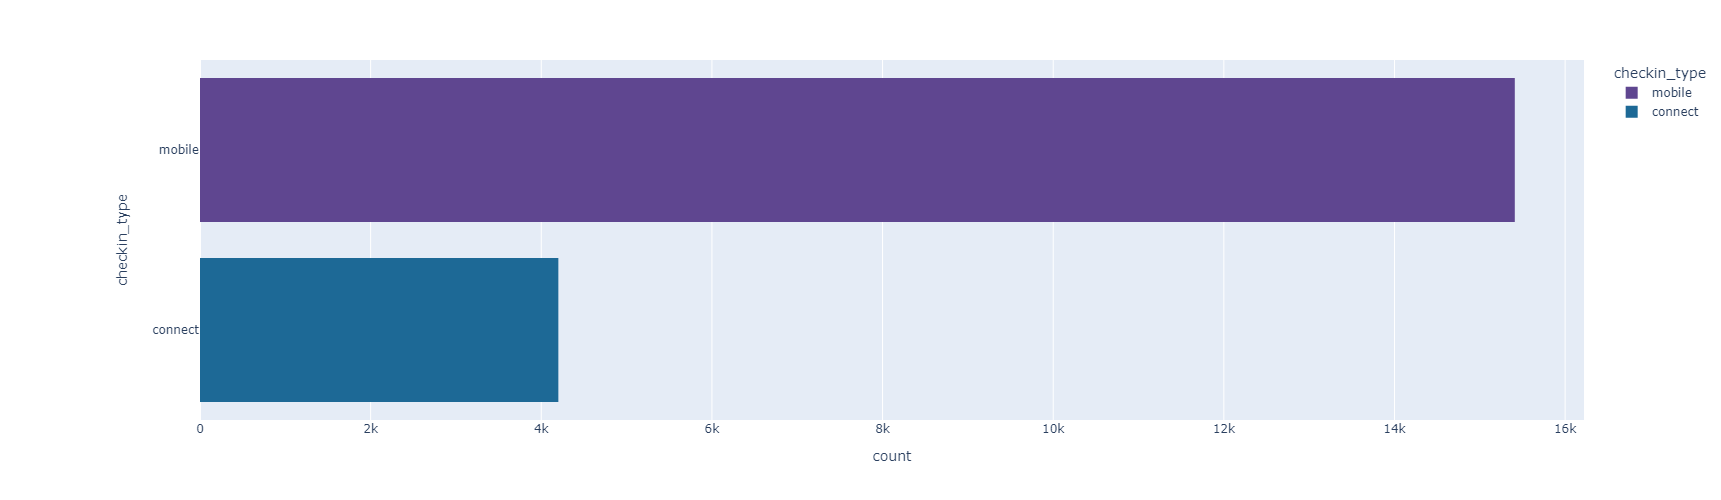

In [204]:
fig = px.histogram(df_delay, y='checkin_type', color='checkin_type', color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_layout(showlegend = True, margin = {'l': 200}, width=1000, height=500)
fig.show()

### 1-Comparison on state between mobile and connect rental

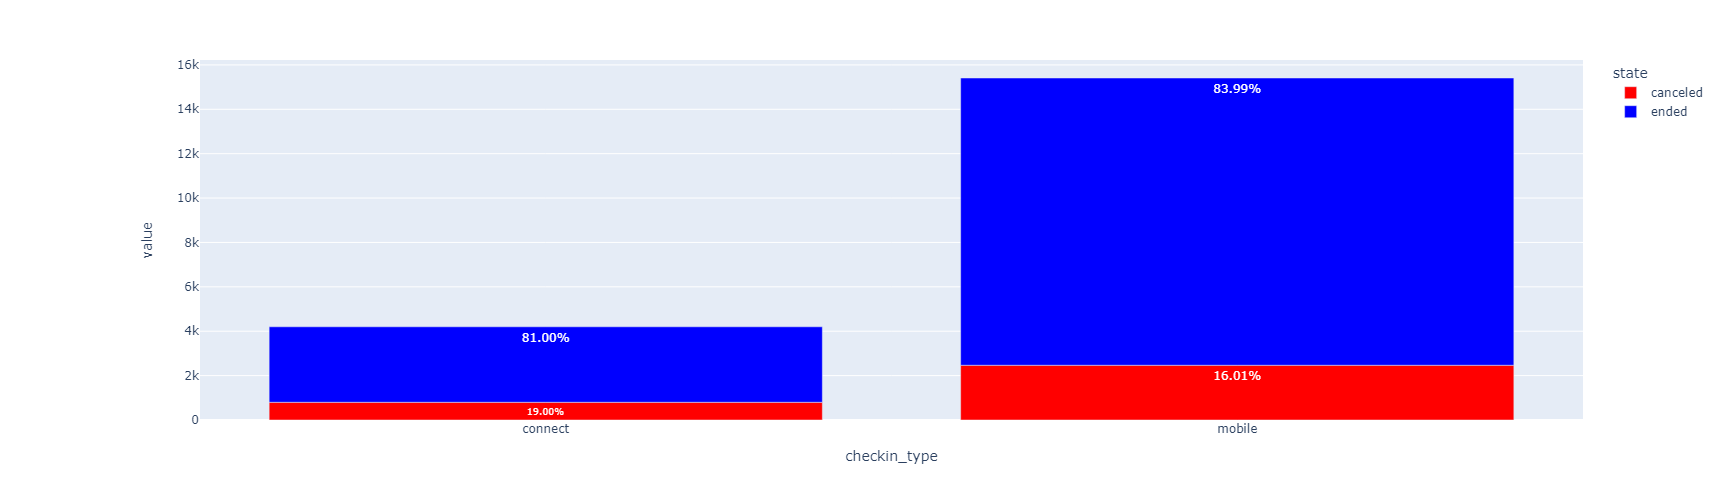

In [120]:
df_g = df_delay.groupby(['checkin_type', 'state'], group_keys=True).size().reset_index()
df_g['percentage'] = df_delay.groupby(['checkin_type', 'state'], group_keys=True).size().groupby(level=0, group_keys=True).apply(lambda x: 100 * x / float(x.sum())).values
df_g.columns = ['checkin_type', 'state', 'Counts', 'Percentage']
fig = px.bar(df_g, x='checkin_type', y=['Counts'], color='state', text=df_g['Percentage'].apply(lambda x: '{0:1.2f}%'.format(x)), color_discrete_map={'ended': 'blue','canceled': 'red'})
fig.update_layout(showlegend = True, margin = {'l': 200}, width=600, height=500)
fig.show()

### The cancellations are more important on connect checkin rental than for mobile one.

### 3-Delays by relationship

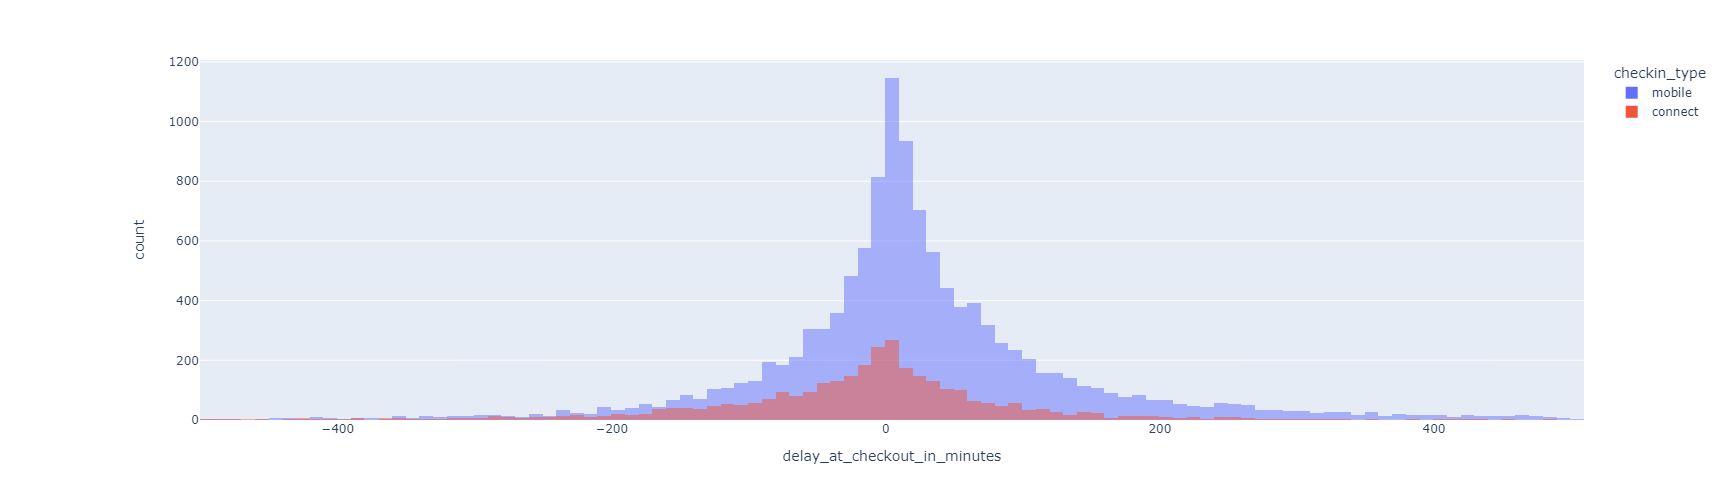

In [154]:
fig = px.histogram(df_delay_without_outliers, x='delay_at_checkout_in_minutes', color='checkin_type', barmode='overlay')
fig.update_layout(showlegend = True, margin = {'l': 200}, width=1000, height=500)
fig.show()

### Delays are distributed the same way, whatever the checkin type.

# Let's focus on positive delays, i.e. people who give back the car late, to determine an acceptable threshold to accept a reasonable delay.

In [163]:
df_positive_delay_without_outliers = df_delay_without_outliers[df_delay_without_outliers.delay_at_checkout_in_minutes > 0]
df_positive_delay_without_outliers.shape[0]

8741

In [249]:
print("Percentage of late people :", round(df_positive_delay_without_outliers.shape[0]/df_delay_without_outliers.shape[0]*100), "%")

Percentage of late people : 57 %


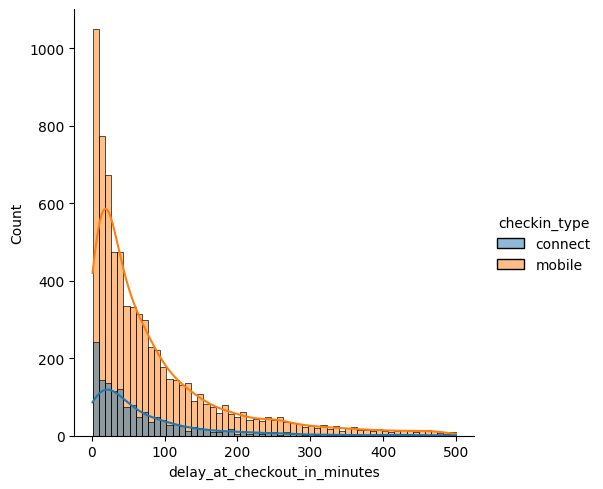

In [299]:
import seaborn as sns
sns.displot(df_positive_delay_without_outliers, x='delay_at_checkout_in_minutes', hue='checkin_type', kde=True, hue_order=['connect', 'mobile'])

### A subjective threshold for connect checkin type could be 80 minutes not to overdue to be strict, 200 minutes to be large.
### A subjective threshold for mobile checkin type could be 200 minutes not to overdue to be strict, 400 minutes to be large.

## Let's count the impacted rentals with given thresholds.

In [215]:
df_mobile_with_thresold = df_positive_delay_without_outliers[df_positive_delay_without_outliers.checkin_type=='mobile']
df_connect_with_thresold = df_positive_delay_without_outliers[df_positive_delay_without_outliers.checkin_type=='connect']

In [232]:
impacted_mobile_count = []
impacted_mobile_percentage = []
impacted_connect_count = []
impacted_connect_percentage = []
arange = range(10, 500, 10)
for i in arange:
    count = df_mobile_with_thresold[df_mobile_with_thresold.delay_at_checkout_in_minutes > i].shape[0]
    impacted_mobile_count.append(count)
    impacted_mobile_percentage.append((count / df_mobile_with_thresold.shape[0])*100)
    count = df_connect_with_thresold[df_connect_with_thresold.delay_at_checkout_in_minutes > i].shape[0]
    impacted_connect_count.append(count)
    impacted_connect_percentage.append((count / df_connect_with_thresold.shape[0])*100)

Text(0.5, 1.0, 'Count of impacted rentals following a threshold on allowed checkout delay')

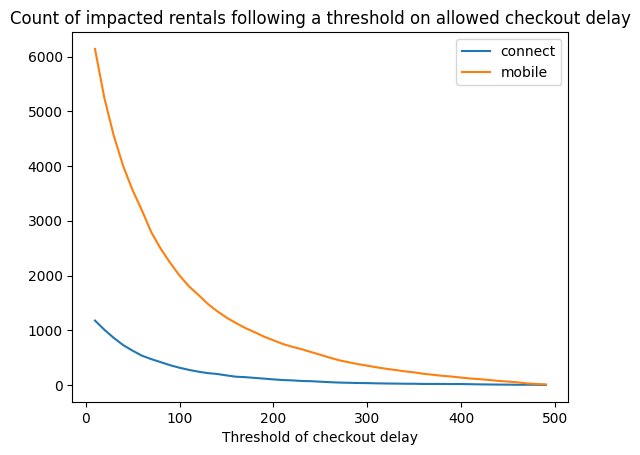

In [242]:
import matplotlib.pyplot as plt
plt.plot(arange, impacted_connect_count)
plt.plot(arange, impacted_mobile_count)
plt.legend(['connect', 'mobile'])
plt.xlabel('Threshold of checkout delay')
plt.title('Count of impacted rentals following a threshold on allowed checkout delay')

Text(0.5, 1.0, 'Percentage of impacted rentals following a threshold on allowed checkout delay')

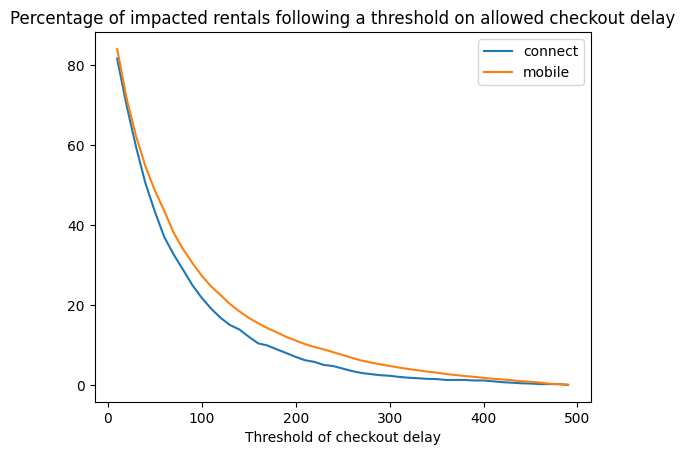

In [243]:
plt.plot(arange, impacted_connect_percentage)
plt.plot(arange, impacted_mobile_percentage)
plt.legend(['connect', 'mobile'])
plt.xlabel('Threshold of checkout delay')
plt.title('Percentage of impacted rentals following a threshold on allowed checkout delay')

In [262]:
for threshold in [80, 120, 150, 180, 200]: # in minutes
    for j, i in enumerate(arange):
        if i == threshold:
            break
    print("\nWith a threshold of", threshold, "minutes, percentage of impacted mobile rentals is", round(impacted_mobile_percentage[j]), "%.")
    print("With a threshold of", threshold, "minutes, percentage of impacted connect rentals is", round(impacted_connect_percentage[j]), "%.")


With a threshold of 80 minutes, percentage of impacted mobile rentals is 34 %.
With a threshold of 80 minutes, percentage of impacted connect rentals is 29 %.

With a threshold of 120 minutes, percentage of impacted mobile rentals is 23 %.
With a threshold of 120 minutes, percentage of impacted connect rentals is 17 %.

With a threshold of 150 minutes, percentage of impacted mobile rentals is 17 %.
With a threshold of 150 minutes, percentage of impacted connect rentals is 12 %.

With a threshold of 180 minutes, percentage of impacted mobile rentals is 13 %.
With a threshold of 180 minutes, percentage of impacted connect rentals is 9 %.

With a threshold of 200 minutes, percentage of impacted mobile rentals is 11 %.
With a threshold of 200 minutes, percentage of impacted connect rentals is 7 %.


## Let's try to exploit the time delta with previous rental data to determine a reasonable authorized delay

### We are going to add a new column : time_delta_with_next_rental_in_minutes.
### We will compare it with the delay and some threshold to determine.

In [279]:
df_delay_copy = df_delay.copy()
df_delay_copy.rename(columns={'time_delta_with_previous_rental_in_minutes':'time_delta_with_next_rental_in_minutes'}, inplace=True)
df_delay_copy = df_delay_copy[['previous_ended_rental_id', 'time_delta_with_next_rental_in_minutes']]
df_threshold = pd.merge(df_positive_delay_without_outliers, df_delay_copy, left_on='rental_id', right_on='previous_ended_rental_id', how='left', suffixes=['', '_y'])
df_threshold.drop(columns=['previous_ended_rental_id_y'], inplace=True)

In [280]:
print('Count before filtering :', df_threshold.shape[0])
df_threshold.dropna(subset=['time_delta_with_next_rental_in_minutes'], inplace=True)
print('Count after filtering :', df_threshold.shape[0])

Count before filtering : 8762
Count after filtering : 825


In [281]:
df_threshold

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,time_delta_with_next_rental_in_minutes
12,531158,404169,mobile,ended,29.0,NaN,NaN,90.0
24,535313,396552,mobile,ended,23.0,NaN,NaN,720.0
29,536978,378931,mobile,ended,271.0,NaN,NaN,60.0
31,537576,397470,mobile,ended,18.0,539005.0,0.0,150.0
51,540649,352528,connect,ended,90.0,NaN,NaN,480.0
...,...,...,...,...,...,...,...,...
8711,567805,295619,mobile,ended,52.0,NaN,NaN,150.0
8728,570526,331673,mobile,ended,23.0,NaN,NaN,210.0
8736,573913,356106,connect,ended,156.0,NaN,NaN,390.0
8739,574596,356190,mobile,ended,10.0,NaN,NaN,30.0


In [285]:
# All the time delta with next rental are fed
df_threshold.time_delta_with_next_rental_in_minutes.isnull().value_counts()

False    825
Name: time_delta_with_next_rental_in_minutes, dtype: int64

### Let's compute the difference between the delta with next rental and the effective delay

In [286]:
df_threshold['difference'] = df_threshold.time_delta_with_next_rental_in_minutes - df_threshold.delay_at_checkout_in_minutes

In [290]:
(df_threshold.difference < 0).value_counts()

False    637
True     188
Name: difference, dtype: int64

### Over the 825 rentals for which we can get the time delta with the next rental, 188 rentals caused some issue because the checkout was done after the beginning of the next rental.

### Let's visualize those issues by delay.

In [291]:
df_issues = df_threshold[df_threshold.difference < 0]
df_issues

,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes,time_delta_with_next_rental_in_minutes,difference
29,536978,378931,mobile,ended,271.0,NaN,NaN,60.0,-211.0
79,544443,337047,mobile,ended,56.0,NaN,NaN,30.0,-26.0
85,545064,194343,connect,ended,74.0,NaN,NaN,30.0,-44.0
112,548646,282893,mobile,ended,201.0,NaN,NaN,30.0,-171.0
173,557514,405433,mobile,ended,47.0,NaN,NaN,0.0,-47.0
...,...,...,...,...,...,...,...,...,...
8372,567682,374360,connect,ended,172.0,NaN,NaN,60.0,-112.0
8469,550671,404424,mobile,ended,105.0,NaN,NaN,0.0,-105.0
8488,545720,367919,connect,ended,8.0,NaN,NaN,0.0,-8.0
8555,556043,368432,mobile,ended,2.0,NaN,NaN,0.0,-2.0


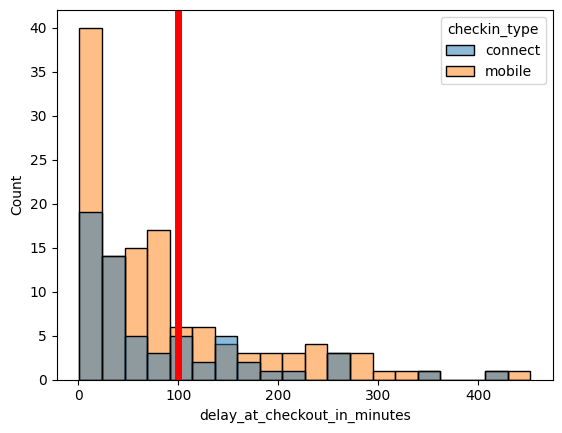

In [317]:
sns.histplot(df_issues, x='delay_at_checkout_in_minutes', hue='checkin_type', hue_order=['connect', 'mobile'], bins=20)
plt.axvline(100, 0, 40, color='red', linewidth=5)

# A good threshold seems to be 100 minutes !

In [320]:
df_issues[df_issues.delay_at_checkout_in_minutes > 100].rental_id.count()

55

### Over the 188 rentals causing a delay issue, 55 still cause an issue after 100 minutes delay.